### trivial_AcO_M1Pos_FEM_cl

In [1]:
import dos
from IPython.display import Image
path = './dos/AcO_M1Pos_FEM_cl'

INFO:DOS:Reading config from ./dos/AcO_M1Pos_FEM_cl/dos.yaml
INFO:DOS:New driver: M1
INFO:M1:New input: Txyz
INFO:M1:New input: Rxyz
INFO:M1:New input: modes
INFO:M1:No inputs!
INFO:DOS:New driver: M2
INFO:M2:New input: Txyz
INFO:M2:New input: Rxyz
INFO:M2:No inputs!
INFO:DOS:New driver: wfs48
INFO:wfs48:No inputs!
INFO:wfs48:New output: M12_RBM
INFO:wfs48:Output logged in!
INFO:DOS:New driver: AcO_controller
INFO:AcO_controller:New input: x_hat
INFO:AcO_controller:New output: M1 TxyzRxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Txyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Rxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M1 BM
INFO:AcO_controller:Output logged in!
INFO:DOS:New driver: M1Pos0
INFO:M1Pos0:New input: TxyzRxyz
INFO:M1Pos0:New output: M1Pos_DeltaF
INFO:M1Pos0:Output logged in!
INFO:DOS:New driver: FEM
INFO:FEM:New input: OSS_Harpoint_delta_F
INFO:FEM:New output: OSS_M1_lcl
INFO:FEM:Ou

SIMCEO server received: Acknowledging connection from SIMCEO client!


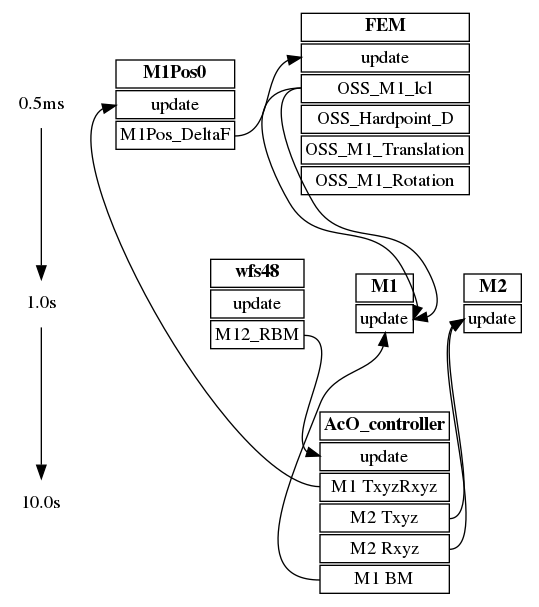

In [2]:
# init
sim = dos.DOS(path, 20, show_timing = 2)
Image(filename=path + '/timing.png')

In [3]:
sim.start()

INFO:DOS:Pushing configuration to server
INFO:M1:GMT
INFO:M2:GMT
INFO:wfs48:OP0


In [4]:
sim.pctComplete

0

INFO:FEM:FEM
INFO:DOS:Initializing
INFO:M1:None
INFO:M2:None
INFO:wfs48:None
INFO:FEM:None
INFO:DOS:Running


In [ ]:
sim.join()
sim.terminate()

logs = sim.logs.entries

In [ ]:
# Save
import pickle
'''
with open('./logs/trivial_AcO_M1Pos_FEM_cl.sclogs', 'wb') as f:
    pickle.dump(sim.logs.entries, f)
    logs = sim.logs.entries
'''
# Load
'''
logs = pickle.load( open( './logs/AcO_M1Pos_FEM_cl.sclogs', "rb" ) )
''';

# plot logs
---

In [ ]:
import matplotlib.pyplot as plt
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

import numpy as np

duration = sim.cfg['simulation']['duration']
xticks = np.arange(0, duration + 1, 50)

logs

In [ ]:
time_1 = logs['FEM']['OSS_M1_lcl'].timeSeries[0]
time_2000 = logs['wfs48']['M12_RBM'].timeSeries[0]
time_50000 = logs['AcO_controller']['M1 BM'].timeSeries[0]

AcO_ref = logs['AcO_controller']['M1 TxyzRxyz'].timeSeries[1]
FEM_out = logs['FEM']['OSS_M1_lcl'].timeSeries[1]

In [ ]:
AcO_ref.shape

In [ ]:
seg = list(range(7))
Txyz = list(range(3))
Rxyz = list(range(3,6))
rbm_str = ['Tx','Ty','Tz','Rx','Ry','Rz']

for s in seg:
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(18,10))
    fig.suptitle('Seg'  + str(s + 1), fontsize=16)
    for rbm in Txyz:
        ax1.plot(time_1[::20000], AcO_ref[s,rbm,:], label = str(rbm_str[rbm]))
        #ax1.plot(time_1, M1Pos_in[:, s * 6 + rbm])
        ax1.set_xticks(xticks)
        ax1.set_title('AcO_controller Txyz')
        ax1.legend()
        ax2.plot(time_1, FEM_out[:,s * 6  + rbm])
        ax2.set_title('FEM OSS_M1_lcl - Txyz')
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
    for rbm in Rxyz:
        ax1.plot(time_1[::20000], AcO_ref[s,rbm,:],label = str(rbm_str[rbm]))
        #ax1.plot(time_1, M1Pos_in[:, s * 6 + rbm])
        ax1.set_title('AcO_controller Rxyz')
        ax1.set_xticks(xticks)
        ax1.legend()
        ax2.plot(time_1, FEM_out[:,s * 6  + rbm])
        ax2.set_title('FEM OSS_M1_lcl - Rxyz')
    plt.show()

In [ ]:
wfs = logs['wfs48']['M12_RBM'].timeSeries[1]

plt.figure(figsize = (15,7))
plt.plot(wfs)
plt.show()

In [ ]:
BM = logs['AcO_controller']['M1 BM'].timeSeries[1]

plt.figure(figsize = (15,7))
plt.plot(BM[0,:,:].T)
plt.show()

---

In [ ]:
logs

In [ ]:
m1lcl = logs['FEM']['OSS_M1_lcl'].timeSeries[1].T
Txyz = logs['FEM']['OSS_M1_Translation'].timeSeries[1].T

In [ ]:
lclTxyz, lclRxyz = np.split(m1lcl,2)

In [ ]:
Txyz.shape

In [ ]:
plt.figure(figsize = (14, 7))
plt.plot(lclTxyz[3,:].T)
plt.plot(Txyz[:,0,1].T , '--')